In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split  #para separar % de testeo y entrenamiento


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Datasets/trainTitanic.csv')



In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:

dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
dataset.shape

(891, 12)

In [ ]:
#Solo usamos las columnas que son relevantes para predicción
datasetLimpio=dataset[["Survived","Pclass","Sex","Age"]]

datasetLimpio.isnull().sum() #retorna el número de nulos en cada columba




Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [ ]:
#Limpieza de datos
datasetLimpio.Age=datasetLimpio.Age.fillna(datasetLimpio.Age.mean()) # fillna para rellenar nulos, en este caso con el promedio de edades


datasetLimpio.dropna(inplace = True) #eliminar filas con valores null

datasetLimpio.isnull().sum() #retorna el número de nulos en cada columba



/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [ ]:
#datasetLimpio.Sex=pd.get_dummies(datasetLimpio["Sex"])["male"].loc[:]  #se hace dummie para tomar female 0 y male 1


varlist =  ['Sex']
def binary_map(x):
    return x.map({'male':1,'female':0})
datasetLimpio[varlist] = datasetLimpio[varlist].apply(binary_map)


datasetLimpio.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [ ]:
datasetLimpio.head()

,Survived,Pclass,Sex,Age,AgeScaler
0,0,3,1,22.0,-0.592481
1,1,1,0,38.0,0.638789
2,1,3,0,26.0,-0.284663
3,1,1,0,35.0,0.407926
4,0,3,1,35.0,0.407926


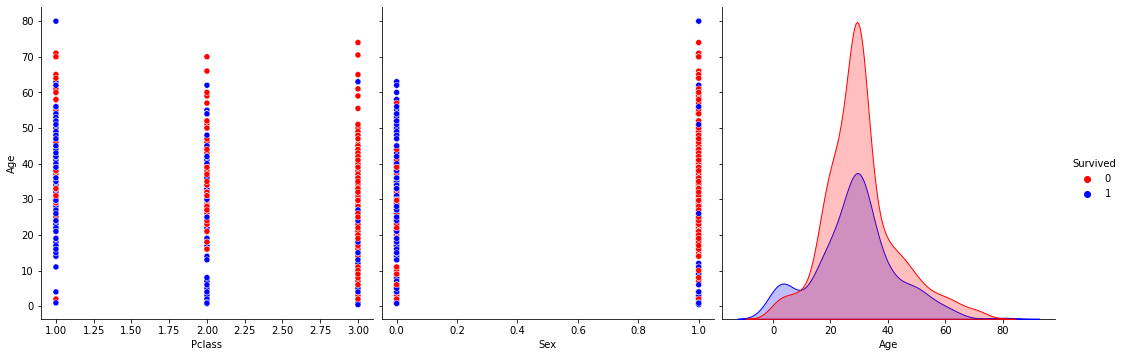

In [ ]:
sns.pairplot(datasetLimpio,
             x_vars=["Pclass","Sex","Age"],
             y_vars='Age',
             aspect=1,height=5, kind='scatter',hue='Survived',palette=("red","blue"))

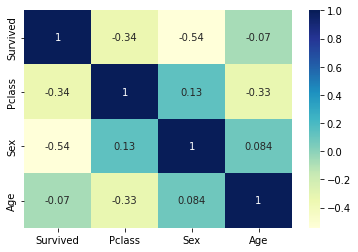

In [ ]:
#mapa de calor
fig, ax = plt.subplots(figsize=(10, 10)) #tamaño del mapa
sns.heatmap(datasetLimpio.corr(), cmap='YlGnBu',annot=True);
plt.show()


Escalamos los datos de la columna edad

In [ ]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler() #Instancia
scal.fit(datasetLimpio["Age"].values.reshape(-1,1)) #Entrenamiento
datasetLimpio["AgeScaler"] = scal.transform(datasetLimpio["Age"].values.reshape(-1,1)) #Genera el nuevo dataset
datasetLimpio=datasetLimpio.drop('Age',axis=1)

In [ ]:
datasetLimpio.head()

,Survived,Pclass,Sex,AgeScaler
0,0,3,1,-0.592481
1,1,1,0,0.638789
2,1,3,0,-0.284663
3,1,1,0,0.407926
4,0,3,1,0.407926


In [ ]:

train, test = train_test_split(datasetLimpio,test_size=0.15)
x_train=train[['Pclass', 'Sex', 'AgeScaler']]
x_test=test[['Pclass', 'Sex', 'AgeScaler']]

y_train=train[['Survived']]
y_test=test[['Survived']]

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(757, 3) (757, 1)
(134, 3) (134, 1)


In [ ]:
#Maquina de soporte vectorial
#kernels -> ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)

In [ ]:
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.75      0.73      0.74        52

    accuracy                           0.80       134
   macro avg       0.79      0.79      0.79       134
weighted avg       0.80      0.80      0.80       134



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.74      0.67      0.71        52

    accuracy                           0.78       134
   macro avg       0.77      0.76      0.77       134
weighted avg       0.78      0.78      0.78       134



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

print(classification_report(y_test,dec_tree.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        82
           1       0.80      0.63      0.71        52

    accuracy                           0.80       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.80      0.80      0.79       134

